# Object Identification with Photograph

In [1]:
import cv2 # pip install opencv-python

In [2]:
import matplotlib.pyplot as plt # pip install matplotlib

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels = [] ## empty List of python
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
   #classLables.append (fpt.read())

In [6]:
 #print(classLabels)
 #print(len(classLabels))

In [7]:
#Modeling Part
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2
model.setInputMean( (127.5,127.5,127.5)) ## mobilenet = [-1,1]
model.setInputSwapRB (True)

<dnn_Model 0x7fa1e109acb0>

# Image Part

In [8]:
 img = cv2.imread('dog.jpeg')

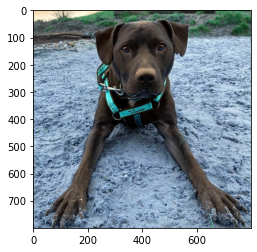

In [9]:
plt.imshow(img)  #BGR

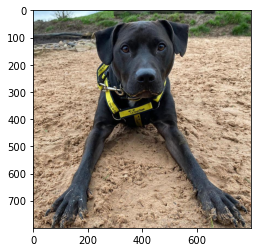

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.6)

In [12]:
print(ClassIndex)

[18]


In [13]:
font_scale = 4
font = cv2.FONT_HERSHEY_PLAIN 
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidece.flatten(), bbox):
    #cv2.rectangle(frame(x,y),x+w, y+h),(255,0,0),2)
    #cv2.PutText(img, text, /text_offset_x,text_offset_y), font, fontScale_font_scale, color= (0,0,0),thickness=1)
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale,color=(0,255,0),thickness=3)

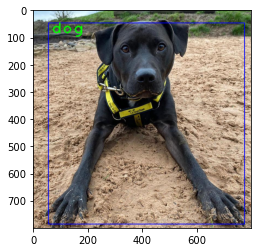

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

#### 


# Video DEMO

In [15]:
cap = cv2.VideoCapture("london.mp4")



# Check if the video is opened correctly
if not cap.isOpened ():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't open the video. ")
    
    
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect (frame,confThreshold=0.5)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if (ClassInd<=80):
                  cv2.rectangle(frame, boxes,(255, 0, 0), 2)
                  cv2.putText(frame,classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font,font_scale,color=(0, 255, 0), thickness=3)
    cv2.imshow('Object Detection Tutorial', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllwindows ()

[ 3  1  6 85  3  1  1  1  3  1  1  1]
[ 3  1  6 85  3  1  1  1  3  1  1  1  1]
[ 3  1  6 85  3  1  1  1  1  3  1  1  1  1]
[ 3  1 85  6  3  1  1  1  1  1  3  1  8  1]
[ 3  1  6 85  3  1  1  1  1  1  3  1  1]
[ 3  1 85  6  3  1  1  1  1  1  1  3]
[85  6  3  1  3  1  1  1  1  1  1  3  1]
[85  3  1  6  3  1  1  1  1  1  1  1  1]
[85  1  3  1  1  3  1  6  1  1  8  1  1  1]
[ 1  3 85  1  3  1  8  1  1  1  1  1  3  1]
[ 1 85  1  3  1  3  1  1  1  8  6  3  1  1]
[ 1 85  3  1  3  6  1  1  1  1  8  3  1]
[ 3  1 85  1  1  3  1  1  8  6  1  3]
[ 1 85  3  1  3  1  1  1  8  6  3  1]
[85  1  1  3  1  6  8  3  1  1  1  3  1]
[85  1  1  3  3  1  1  1  6  8  3]
[85  1  3  1  3  1  8  1  1  1  1]
[ 1 85  1  1  3  3  1  8  1  6  1]
[85  1  1  8  3  1  1  3  1  1  3]
[85  1  1  3  3  1  1  1  6  8  1  3  1]
[ 1 85  1  8  3  1  1  3  1  6  1  1  1  3]
[85  1  1  1  1  3  1  3  6  8  1  1  3  1  1]
[85  1  6  1  1  3  3  1  1  8  1  1  1]
[85  1  1  1  8  3  6  3  1  1  1  1  3  1  6]
[85  1  1  6  8  1  3 

[ 1  6  3  6 85  3  1  1  3  3  3  6  6  3  6 85]
[ 3  1  3  1  6 85  3  3  6  3  1  3  1  6  6 85  6]
[ 1  3  3  1  3  6 85  3  3  1  6  3  6 85]
[ 1  3  3  3 85  1  6  3  3  3  6  1 85]
[ 1  3  3  3  6 85  1  3  6  3  3  1 31 85  6]
[ 1  3 85  3  6  3  1  6  3  3  3 31 85]
[ 1 85  6  3  6  1  3  3  3  3  6 85  3 31]
[ 1 85  6  3  1  3  6  3 31  3  6 85  3  1  6]
[ 1  3 85  6  3  3  6  1 31  3  3  6  3 85 27]
[ 3  1  3 85  6  3  1  3 31  3 27  6  3 85  1 31]
[ 1 85  6  3  1  3 31  6  3  3  6 27  3 27  1]
[ 1  6 85  3  3  3  1  6  1  6 31  3  3 27 85  1  3]
[ 1  6  6 85  3  3  3  1  6  1 31  1  3  3 27]
[ 1  6  6 85  1  3  6  3  1  3 31  3 85  6  1]
[85  1  6  6  3  3  6  1  1  3 85  3  1  6  1  3  3]
[ 3 85  1  6  3  1  6  6  3  1  3 85 31  1  3 31  6  3]
[ 3 85  1  1  6  3  3  1  3 85  1  6  6 31  1 31 31 31  3]
[ 3 85  1  6  1  3  1  3 85  6 31 31  3  6  1]
[ 3  1 85  1  6  1  3  3 85  3 31  1  3  6]
[ 3  1 85  1  6  3  3  1  3 85 31  1  6 31 31  6 27  3]
[ 1 85  1  3  6  3  1  3  3

error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
